In [1]:

import importlib
import numpy as np
from mesa.experimental import SolaraViz

from scripts.agents.orders import Order
from scripts.agents.riders import Rider
from scripts import delivering
from animation.utils import agent_portrayal, plot_lines

In [2]:
np.random.seed(19)
num_riders = 2
max_t = 30
num_orders = 2

orders = [
    Order(
        id=i,
        creation_at=0,#(i+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, i*2),
    )
    for i in range(num_orders)
]

riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }


In [3]:
model= delivering.Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_in_shift,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_created,orders_assigned,orders_delivered,orders_waiting,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum,orders_delivered_cum
0,2,1,1,0,0,2,2,0,0,NaN,NaN,2.0,NaN,2,0,0
1,2,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
2,2,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
3,2,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
4,2,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
5,0,0,1,0,1,0,0,0,0,NaN,NaN,2.0,NaN,2,0,0
6,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN,2.0,2,2,0
7,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN,2.0,2,2,0
8,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN,2.0,2,2,0
9,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN,2.0,2,2,0


<Axes: >

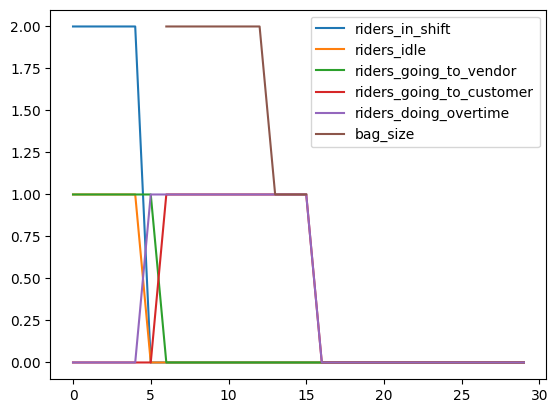

In [4]:
display(df)
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_in_shift,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_created,orders_assigned,orders_delivered,orders_waiting,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum,orders_delivered_cum
0,10,10,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0
1,10,7,3,0,0,5,5,0,0,NaN,NaN,1.666667,NaN,5,0,0
2,10,5,5,0,0,5,5,0,0,NaN,NaN,2.000000,NaN,10,0,0


<Axes: >

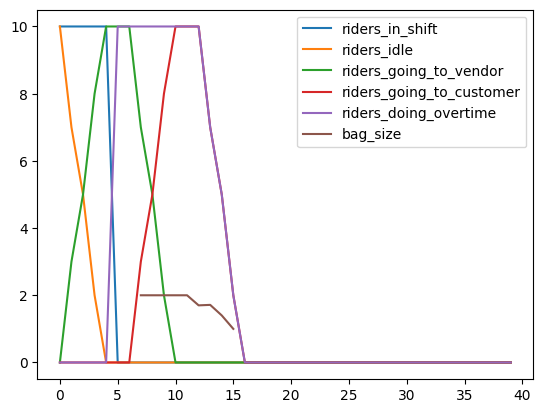

In [5]:
np.random.seed(19)
num_riders = 10
max_t = 40
num_orders = 50

orders = [
    Order(
        id=i,
        creation_at=(i//5+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
    )
    for i in range(num_orders)
]
riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= delivering.Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
display(df[:3])
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

In [6]:
viz = SolaraViz(
    model_class=delivering.Dispatcher,
    #components=[Graph],
    model_params=model_params,
    name="Dispatcher",
    play_interval=10,
    agent_portrayal=agent_portrayal,
    measures=["delivery_time", "orders_assigned", "bag_size", "queue_size", "riders_idle", "riders_going_to_vendor", "orders_picked_up_cum", "orders_delivered"],
  
)

viz

Cannot show ipywidgets in text

In [7]:
importlib.reload(delivering)

np.random.seed(19)

# TODO do a function to convert a list of quantities of orders into orders ->
# for each i, will create as many orders as are in the list[i]

_orders = [0, 20, 40, 100, 110, 90, 50, 0, 0]*2
_riders = [0, 4, 10, 50, 10, 5, 5, 7, 0]*2
max_t = len(_orders) + 7



orders = [
    Order(
        id=sum(_orders[:t])+i,
        creation_at=t,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
        preparation_time=q%2,
    )
    for t, q in enumerate(_orders) 
    for i in range(q)
]
riders = [ 
    Rider(
        id=i, 
        shift_start_at=t, 
        shift_end_at=min(t+7, max_t),
        starting_point=(0,0)
    )
    for t, q in enumerate(_riders) 
    for i in range(q)
        ]

model_params={
        "bag_limit": 5,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= delivering.Dispatcher(**model_params)
for i in range(max_t+10):
    model.step()
df = model.datacollector.get_model_vars_dataframe()

display(df[:10])
display(df[-10:])



/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!


,riders_in_shift,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_created,orders_assigned,orders_delivered,orders_waiting,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum,orders_delivered_cum
0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0
1,4,0,4,0,0,20,20,0,0,NaN,NaN,5.0,NaN,20,0,0
2,14,2,12,0,0,40,40,0,0,NaN,NaN,5.0,NaN,60,0,0
3,64,32,32,0,0,100,100,0,0,NaN,NaN,5.0,NaN,160,0,0
4,74,20,54,0,0,110,110,0,0,NaN,NaN,5.0,NaN,270,0,0
5,79,7,72,0,0,90,90,0,0,NaN,NaN,5.0,NaN,360,0,0
6,84,2,82,0,0,50,50,0,0,NaN,NaN,5.0,NaN,410,0,0
7,91,9,78,4,0,0,0,0,0,NaN,NaN,5.0,5.0,410,20,0
8,87,9,70,12,4,0,0,0,0,NaN,NaN,5.0,5.0,410,60,0
9,77,9,50,32,14,0,0,0,0,NaN,NaN,5.0,5.0,410,160,0


,riders_in_shift,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_created,orders_assigned,orders_delivered,orders_waiting,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum,orders_delivered_cum
25,0,0,0,78,78,0,0,72,0,12.416667,12.695205,NaN,3.025641,820,820,584
26,0,0,0,70,70,0,0,78,0,12.974359,12.728097,NaN,2.257143,820,820,662
27,0,0,0,50,50,0,0,70,0,13.742857,12.825137,NaN,1.760000,820,820,732
28,0,0,0,28,28,0,0,50,0,14.240000,12.915601,NaN,1.357143,820,820,782
29,0,0,0,10,10,0,0,28,0,14.642857,12.975309,NaN,1.000000,820,820,810
30,0,0,0,0,0,0,0,10,0,15.000000,13.000000,NaN,NaN,820,820,820
31,0,0,0,0,0,0,0,0,0,NaN,13.000000,NaN,NaN,820,820,820
32,0,0,0,0,0,0,0,0,0,NaN,13.000000,NaN,NaN,820,820,820
33,0,0,0,0,0,0,0,0,0,NaN,13.000000,NaN,NaN,820,820,820
34,0,0,0,0,0,0,0,0,0,NaN,13.000000,NaN,NaN,820,820,820


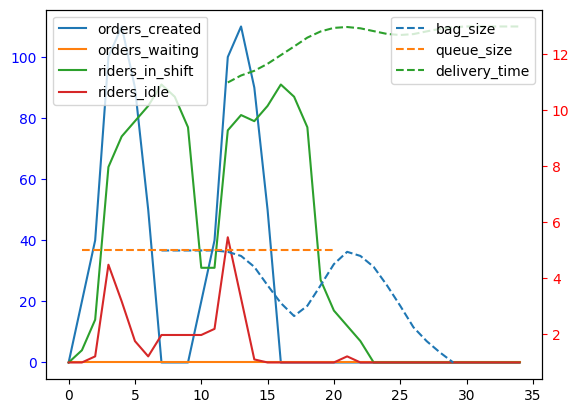

In [8]:
cols1 = [
    ["orders_created", "orders_waiting", "riders_in_shift", "riders_idle"], 
    ["bag_size", "queue_size", "delivery_time"]
    ]
plot_lines(df, cols1)